In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [20]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

### The size of each photo is 28 X 28 resolution

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

### There are 28 values of each different pixels ranging from 0 to 255

In [23]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Showing the first image for the dataset

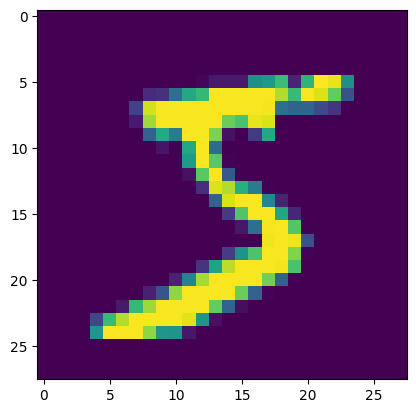

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0]);

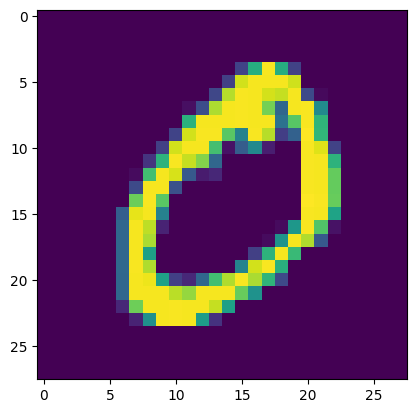

In [25]:
plt.imshow(X_train[1]);

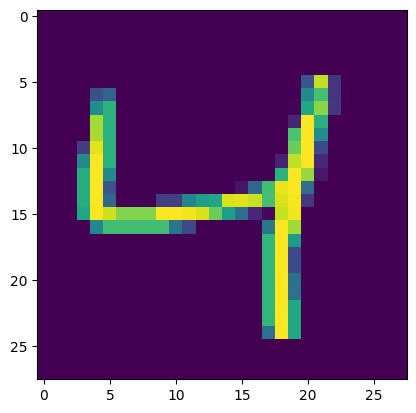

In [26]:
plt.imshow(X_train[2]);

### Scale down the values of the pixels to a range of 0 to 1 so that the convergence in the neural network occurs faster

In [27]:
# dividing the pixels values by 255
X_train=X_train/255
X_test=X_test/255

In [28]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Training the ANN model

In [29]:
np.random.seed(42)
model = Sequential()
model.add(Flatten(input_shape=(28,28)))   # transforming 28*28 2D array into an 1D array
# model.add(Dense(128,activation='relu'))
# model.add(Dense(10,activation='softmax'))
model.add(Dense(128,activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()
# Calculation summary
'''
input layer: 28*28 = 784
hidden_layer_1: 784*128+128 = 100480
hidden_layer_2: 128*10+10 = 1290
'''

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 48)             │         6,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,162 (418.60 KB)

 Trainable params: 107,162 (418.60 KB)

 Non-trainable params: 0 (0.00 B)

'\ninput layer: 28*28 = 784\nhidden_layer_1: 784*128+128 = 100480\nhidden_layer_2: 128*10+10 = 1290\n'

In [31]:
np.random.seed(42)
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
# history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8588 - loss: 0.4813 - val_accuracy: 0.9541 - val_loss: 0.1522
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9627 - loss: 0.1210 - val_accuracy: 0.9653 - val_loss: 0.1164
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0757 - val_accuracy: 0.9683 - val_loss: 0.1057
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9807 - loss: 0.0597 - val_accuracy: 0.9706 - val_loss: 0.1039
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9854 - loss: 0.0463 - val_accuracy: 0.9706 - val_loss: 0.1048
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0344 - val_accuracy: 0.9748 - val_loss: 0.0973
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9722 - val_loss: 0.1061
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9924 - loss: 0

In [32]:
y_prob = model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.4012985e-45, 1.0076917e-33, 1.2175283e-23, ..., 1.0000000e+00,
        3.8357801e-28, 6.4075200e-21],
       [0.0000000e+00, 6.5845178e-35, 1.0000000e+00, ..., 6.5861028e-44,
        1.9860172e-36, 0.0000000e+00],
       [2.0139284e-25, 1.0000000e+00, 4.3302475e-17, ..., 3.0933567e-12,
        8.9076847e-19, 2.5902714e-31],
       ...,
       [0.0000000e+00, 1.8216880e-44, 0.0000000e+00, ..., 1.0340242e-31,
        3.6433760e-44, 1.7861803e-35],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.1635637e-27, 0.0000000e+00],
       [3.1180446e-39, 0.0000000e+00, 3.4558556e-38, ..., 0.0000000e+00,
        3.6556681e-32, 1.2611686e-44]], dtype=float32)

In [33]:
y_preds = y_prob.argmax(axis=1)
y_preds

array([7, 2, 1, ..., 4, 5, 6])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.9775

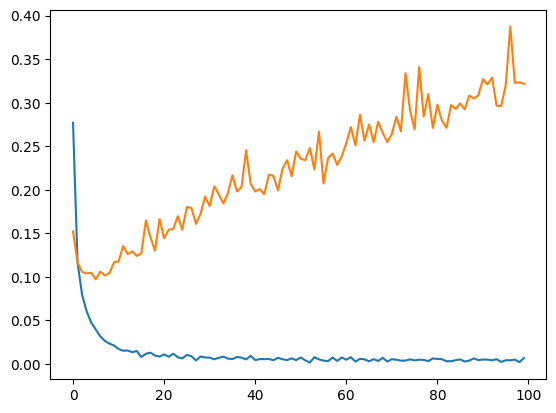

In [35]:
# ploting the graphs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

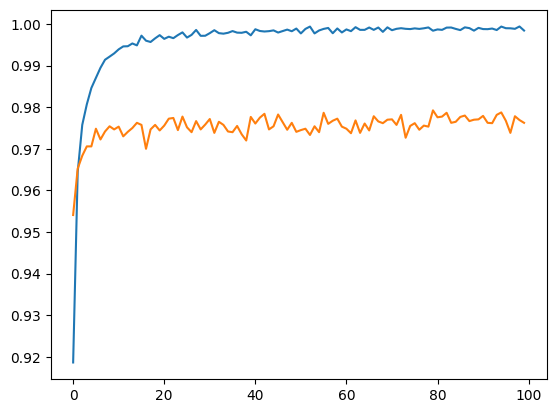

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### testing our model in real basis

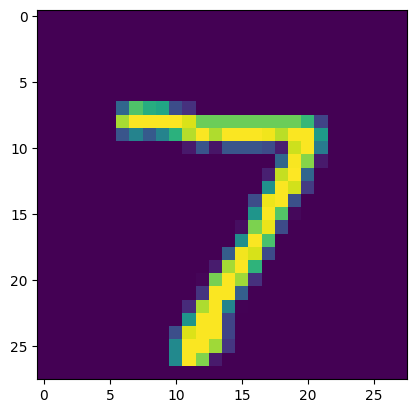

In [38]:
plt.imshow(X_test[0]);

In [41]:
# making predicition with out model
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([7])

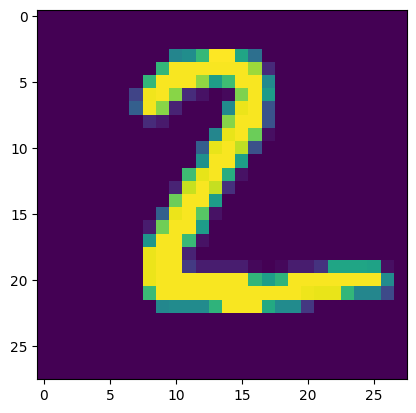

In [42]:
plt.imshow(X_test[1]);

In [43]:
# making predicition with out model
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([2])